In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Flight Price Prediction
__Problem Statement:__
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

In [2]:
#lets import the dataset
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#lets add source column to train and test dataset
train["source"] = "train"
test["source"] = "test"

In [5]:
#lets combine both the datasets
df = pd.concat([train,test],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


## FEATURES:
__Airline:__ The name of the airline.

__Date_of_Journey:__ The date of the journey

__Source:__ The source from which the service begins.

__Destination:__ The destination where the service ends.

__Route:__ The route taken by the flight to reach the destination.

__Dep_Time:__ The time when the journey starts from the source.

__Arrival_Time:__ Time of arrival at the destination.

__Duration:__ Total duration of the flight.

__Total_Stops:__ Total stops between the source and destination.

__Additional_Info:__ Additional information about the flight

__Price:__ The price of the ticket (this is our target variable)

In [6]:
#Lets chcek the null values in the dataset
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

We are having only one null value here,

In [7]:
#Lets chcek the datatypes of the columns
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
source              object
dtype: object

I observe that Date_of_Journy , De_Time and Arrival_Time contains dates and time but their data type is object, lets convert it to datatime

In [8]:
#lets convert data type to datetime
df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Date_of_Journey'])


In [9]:
#Check the data types again
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
source                     object
dtype: object

Great we have successfully converted the data types.

In [10]:
#Lets fill the null values 
#As these are categorical columns so I will replace null values with mode of that column
df['Route'].fillna(df['Route'].mode().iloc[0], inplace = True)
df['Total_Stops'].fillna(df['Total_Stops'].mode().iloc[0], inplace = True)


##### I am creating new columns using Date_of_Journey column, whith day, month and year separately

In [11]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df["Journey_year"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year
df.drop(columns = "Date_of_Journey", inplace = True)

As I derived new columns for Date_of_Journey, I have dropped this column

In [12]:
#Getting Duration column using Arrival_Time and Dep_Time
x = (df["Arrival_Time"]-df["Dep_Time"])
duration_list = list()
for i in range(len(x)):
    dur = x.iloc[i].seconds/3600
    duration_list.append(dur)
df["Duration"] = duration_list

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Dep_time"] = df["Dep_hour"] + df["Dep_min"]/60

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

* Now we Know journy day and duration of flight, and Arrival time is depends on these two column so we can drop Arrival_time column.

In [14]:
#lets drop Arrival_Time column
df.drop(columns = "Arrival_Time", inplace = True)

In [15]:
#Lets check the dataset after updating
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,1.666667,non-stop,No info,3897.0,train,24,3,2019,22,20,22.333333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,18.166667,2 stops,No info,7662.0,train,5,1,2019,5,50,5.833333
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,14.583333,2 stops,No info,13882.0,train,6,9,2019,9,25,9.416667
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.916667,1 stop,No info,6218.0,train,5,12,2019,18,5,18.083333
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,7.166667,1 stop,No info,13302.0,train,3,1,2019,16,50,16.833333


* By using Departure time column we created two seperates columns with Hours and minutes data, and using these two columns we created __Dep_time__ column, which contains float value, so we can drop Dep_hour & Dep_min

In [16]:
df.drop(columns = ['Dep_hour','Dep_min'], inplace = True)

In [17]:
#Lets check the value counts from Journey_year column
df['Journey_year'].value_counts()

2019    13354
Name: Journey_year, dtype: int64

We can see all the data is from same year so we will delete year column.

In [18]:
df.drop(columns = 'Journey_year', inplace = True)

In [19]:
#lets check the data after updation
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,1.666667,non-stop,No info,3897.0,train,24,3,22.333333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,18.166667,2 stops,No info,7662.0,train,5,1,5.833333
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,14.583333,2 stops,No info,13882.0,train,6,9,9.416667
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.916667,1 stop,No info,6218.0,train,5,12,18.083333
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,7.166667,1 stop,No info,13302.0,train,3,1,16.833333


In [20]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration           float64
Total_Stops         object
Additional_Info     object
Price              float64
source              object
Journey_day          int64
Journey_month        int64
Dep_time           float64
dtype: object

In [21]:
#Lets chcek the value counts of each categorical column
cat_columns = ['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for col in df[cat_columns]:
    if df[col].dtype=="object":
        print('--------------------------------------')
        print(df[col].value_counts())
        print()

--------------------------------------
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

--------------------------------------
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

--------------------------------------
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

--------------------------------------
DEL → BOM → COK          3001
BLR → DEL                19

* By checking the value counts of every categorical column we will do some modifications
* In column Additional_Info We will combine __1 Long layover__ and __2 Long layover__ with __Long layover__
* And __No Info__ with __No info__

In [22]:
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

df["Additional_Info"].replace("No Info","No info",inplace=True)

* In column Airline we will combine __Jet Airways Business__ with __Jet Airways__.
* __Multiple carriers Premium economy__ with __Multiple carriers__.
* __Vistara Premium economy__ with __Vistara__

In [23]:
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [24]:
#In Destination column "New Delhi" can be replaced by "Delhi"
df["Destination"].replace("New Delhi","Delhi",inplace=True)

In [25]:
#Lets again chcek the value counts
for col in df[cat_columns]:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print('-------------------------------------------')

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64
-------------------------------------------
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
-------------------------------------------
Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
-------------------------------------------
DEL → BOM → COK          3001
BLR → DEL                1941
CCU → BOM → BLR          1232
CCU → BLR                 896
BOM → HYD                 785
                         ... 
BOM → DED → DEL → HYD       1
CCU → IXA → BLR             1
BOM → RPR → VTZ → HYD       1
BOM → JLR → HYD             1
BOM → CCU → HYD             1
Name: Route, Length: 132, dtype: int64
---

In [26]:
#lets check total stops
df["Total_Stops"].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
# As this is case of Ordinal Categorical type 
# we will assign values to corresponding keys
df.replace({"non-stop": 0,
            "1 stop": 1,
            "2 stops": 2,
            "3 stops": 3,
            "4 stops": 4},
           inplace = True)

In [28]:
# Check data 
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,IndiGo,Banglore,Delhi,BLR → DEL,1.666667,0,No info,3897.0,train,24,3,22.333333
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,18.166667,2,No info,7662.0,train,5,1,5.833333
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,14.583333,2,No info,13882.0,train,6,9,9.416667
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.916667,1,No info,6218.0,train,5,12,18.083333
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,7.166667,1,No info,13302.0,train,3,1,16.833333


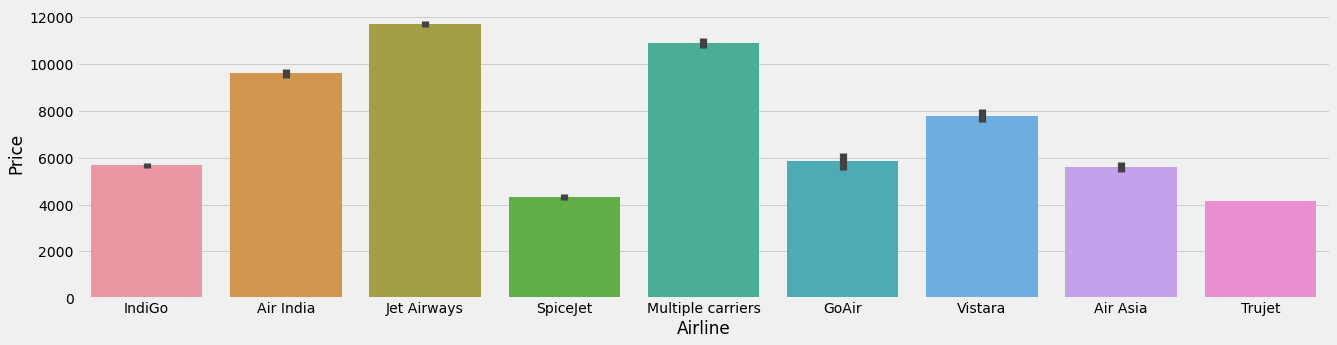

In [29]:
#lets check which airline is expensive based on average price
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,5))
sns.barplot(x = "Airline", y = "Price", data=df)
plt.show()

* By above plot we can say that the Jet Airways is most expensive airline, followed by Multiple carriers Airline and Air India.
* Spicejet and Trujet Airlines are cheaper compared to others.

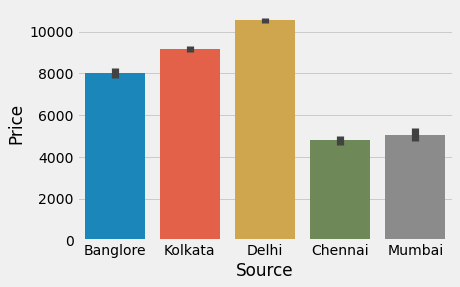

In [30]:
#Lets see the average price for each region
sns.barplot(x = "Source", y= "Price", data = df)
plt.show()

* Average prices are higher at Delhi region compared to others and cheaper at Chennai and Mumbai.

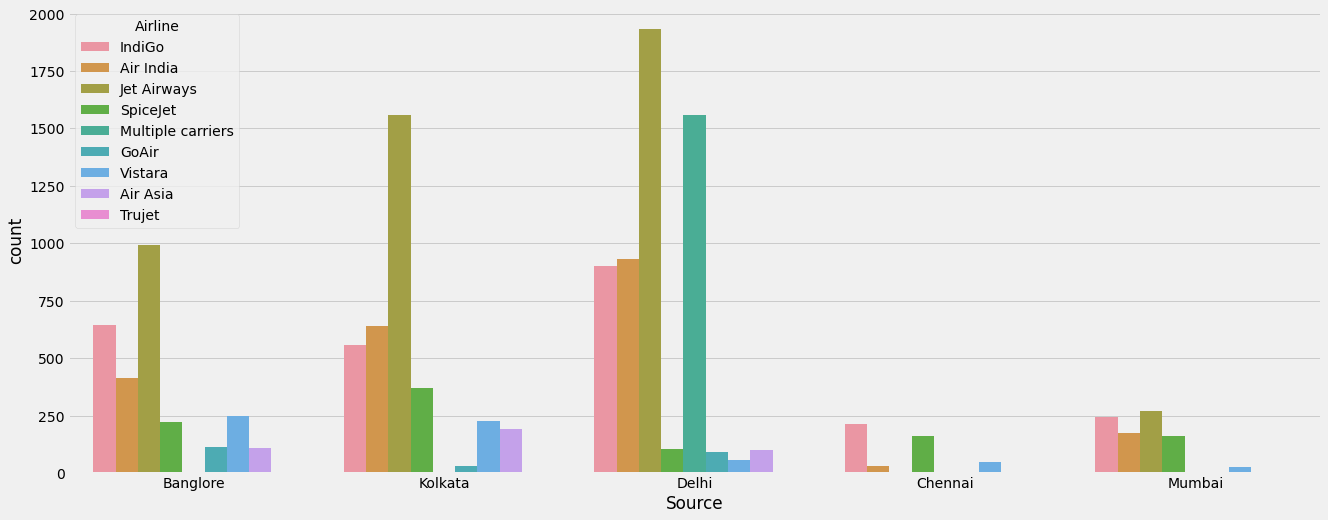

In [31]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,8))
sns.countplot(x = "Source", hue = "Airline", data = df)
plt.show()

* We can say that the Jet Airways airline is much popular than others in every region except in chennai.
* And we can see Multiple carrier airlines is only associates with Delhi region.

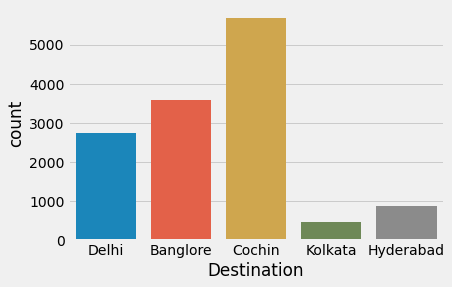

In [32]:
#lets see the counts of destinations
sns.countplot(df['Destination'])
plt.show()

* As shown in this plot large number of flight's destination is cochin, and very few flight are going to Kolkata and Hyderabad.

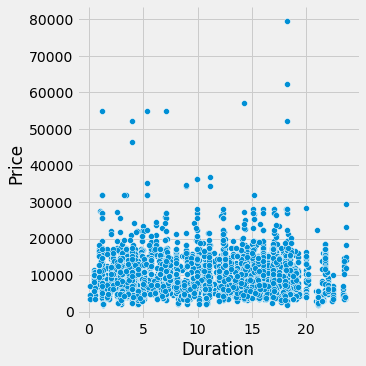

In [33]:
#lets check the relation between Duration and price
sns.relplot(x = 'Duration', y = 'Price', data = df)
plt.show()

Looking at above plot it is difficult to conclude anything.

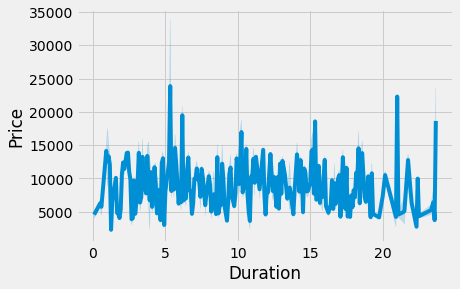

In [34]:
#lets plot a line plot for duration and price
sns.lineplot(x = "Duration", y = "Price", data = df)
plt.show()

* As we see that Duration has not much impact on price of flight.

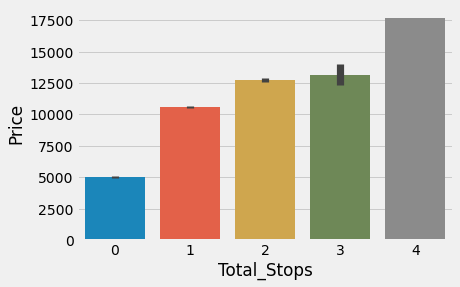

In [35]:
#lets plot barplot for total stops vs price
sns.barplot(x = 'Total_Stops', y = 'Price', data = df)
plt.show()

* we can say flights with 4 stops has higher price compared to others, and flights with 0 stops(that is non-stop) is having less price compared to others.

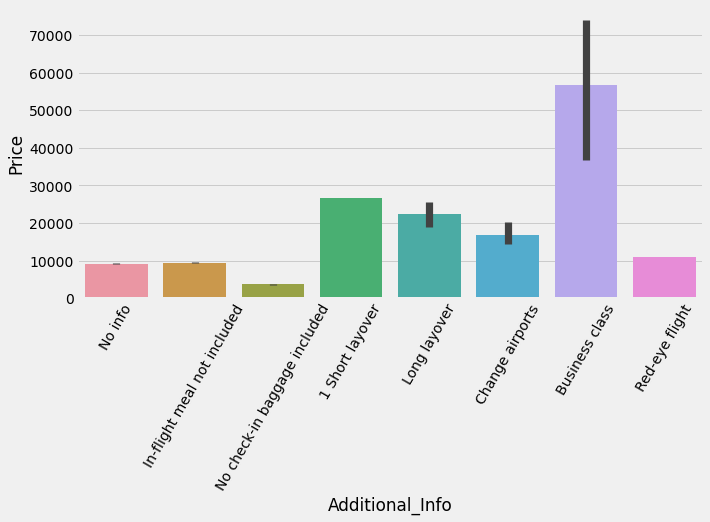

In [36]:
#lets see how Additional_Info affects flight price.
plt.figure(figsize = (10,5))
sns.barplot(x = 'Additional_Info', y = 'Price', data = df)
plt.xticks(rotation = 60)
plt.show()

* This will tell us that the Business class flights are much expencive than others, and the flight with No check-in baggage included class has least price. 

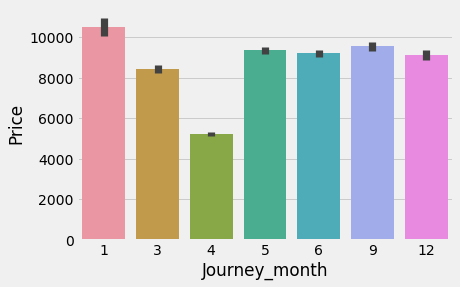

In [37]:
#Lets see how Journy month affects the flight price
sns.barplot(x = 'Journey_month', y = 'Price', data = df)
plt.show()

Looking at above plot we can conclude that the flights from the month of april has less price compared to other months. and flights in the month of January are much expensive than others.

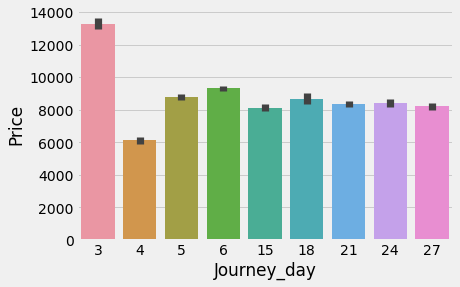

In [38]:
#Lets see how Journy day affects the flight price
sns.barplot(x = 'Journey_day', y = 'Price', data = df)
plt.show()

We can say that there is not much impact of day on price.

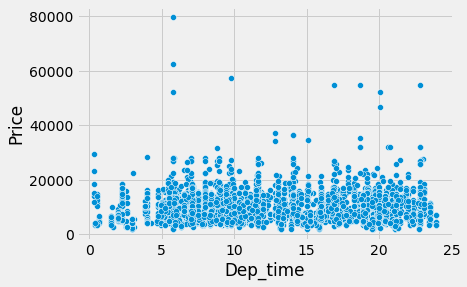

In [39]:
#Lets check the relation between Dep_time and price
sns.scatterplot(x = 'Dep_time', y = 'Price', data = df)
plt.show()

* By seeing above plot we can say there is no any fix relation between Dep_time and flight price.

In [40]:
#lets check the description
df.describe()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_time
count,13354.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.000000
mean,11.078291,0.826045,9087.064121,12.551146,5.549274,12.921709
std,5.736488,0.674608,4611.359167,8.759967,2.998690,5.736488
min,0.083333,0.000000,1759.000000,3.000000,1.000000,0.333333
25%,5.916667,0.000000,5277.000000,5.000000,3.000000,8.000000
50%,12.083333,1.000000,8372.000000,6.000000,5.000000,11.916667
75%,16.000000,1.000000,12373.000000,21.000000,6.000000,18.083333
max,23.666667,4.000000,79512.000000,27.000000,12.000000,23.916667


Looking at the data description it is ensured that there is no any null values in data.
* count is less in Price column because it contains only train data

## Encoding

In [41]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
#lets have a look on data after encoding
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,1.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,1.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,1.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,1.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,1.0,3,1,16.833333


## Heat map for checking correlation

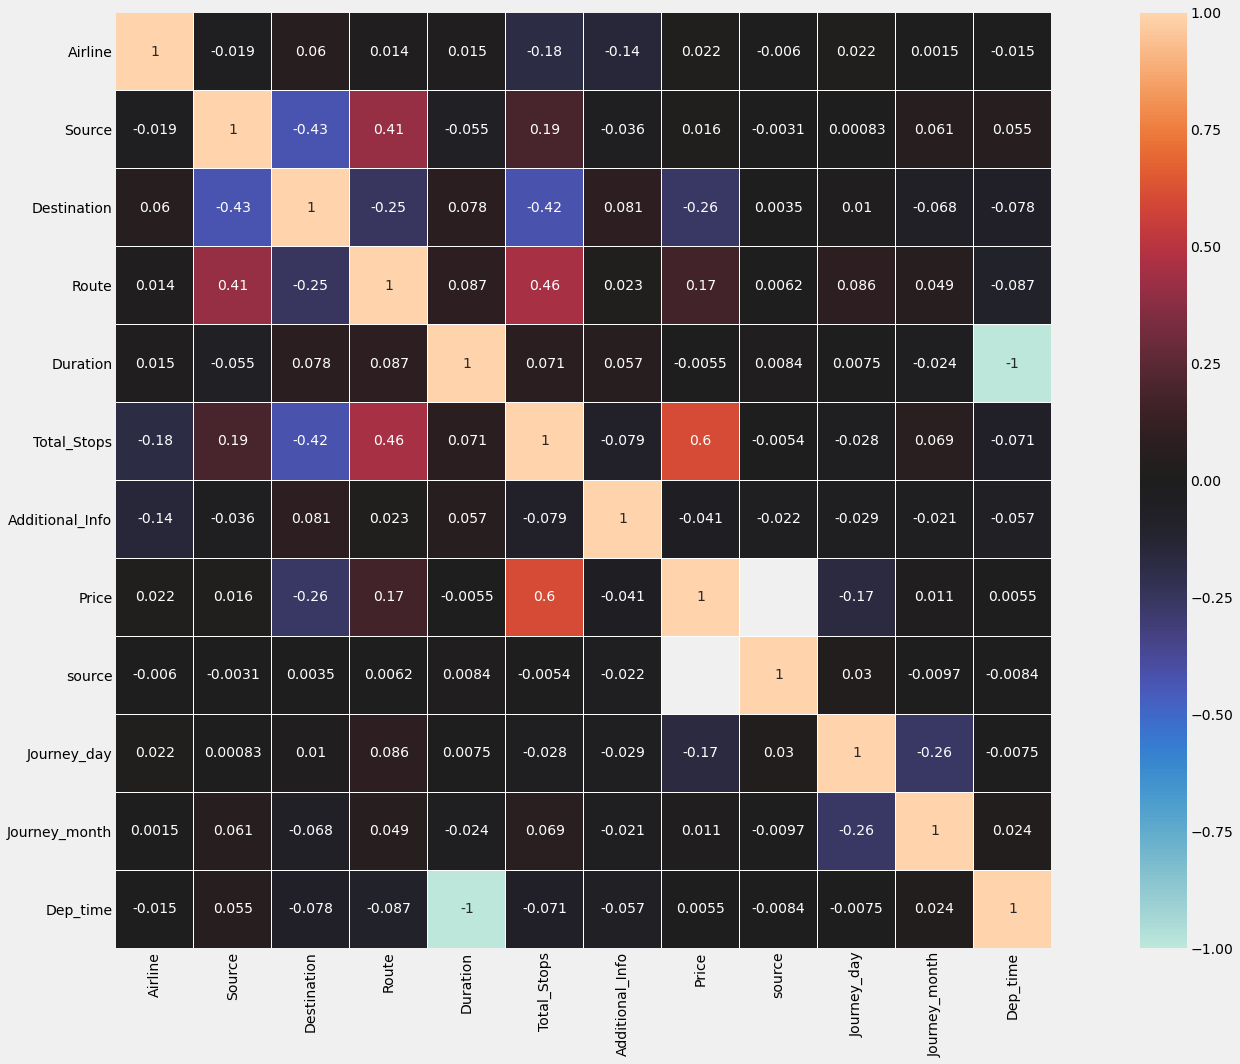

In [43]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

By looking at the heat map we can say Total_stops has maximum correlation with price.

Column Dep_Time and Duration are strongly and negatively related to each other.

## Check for Outliers

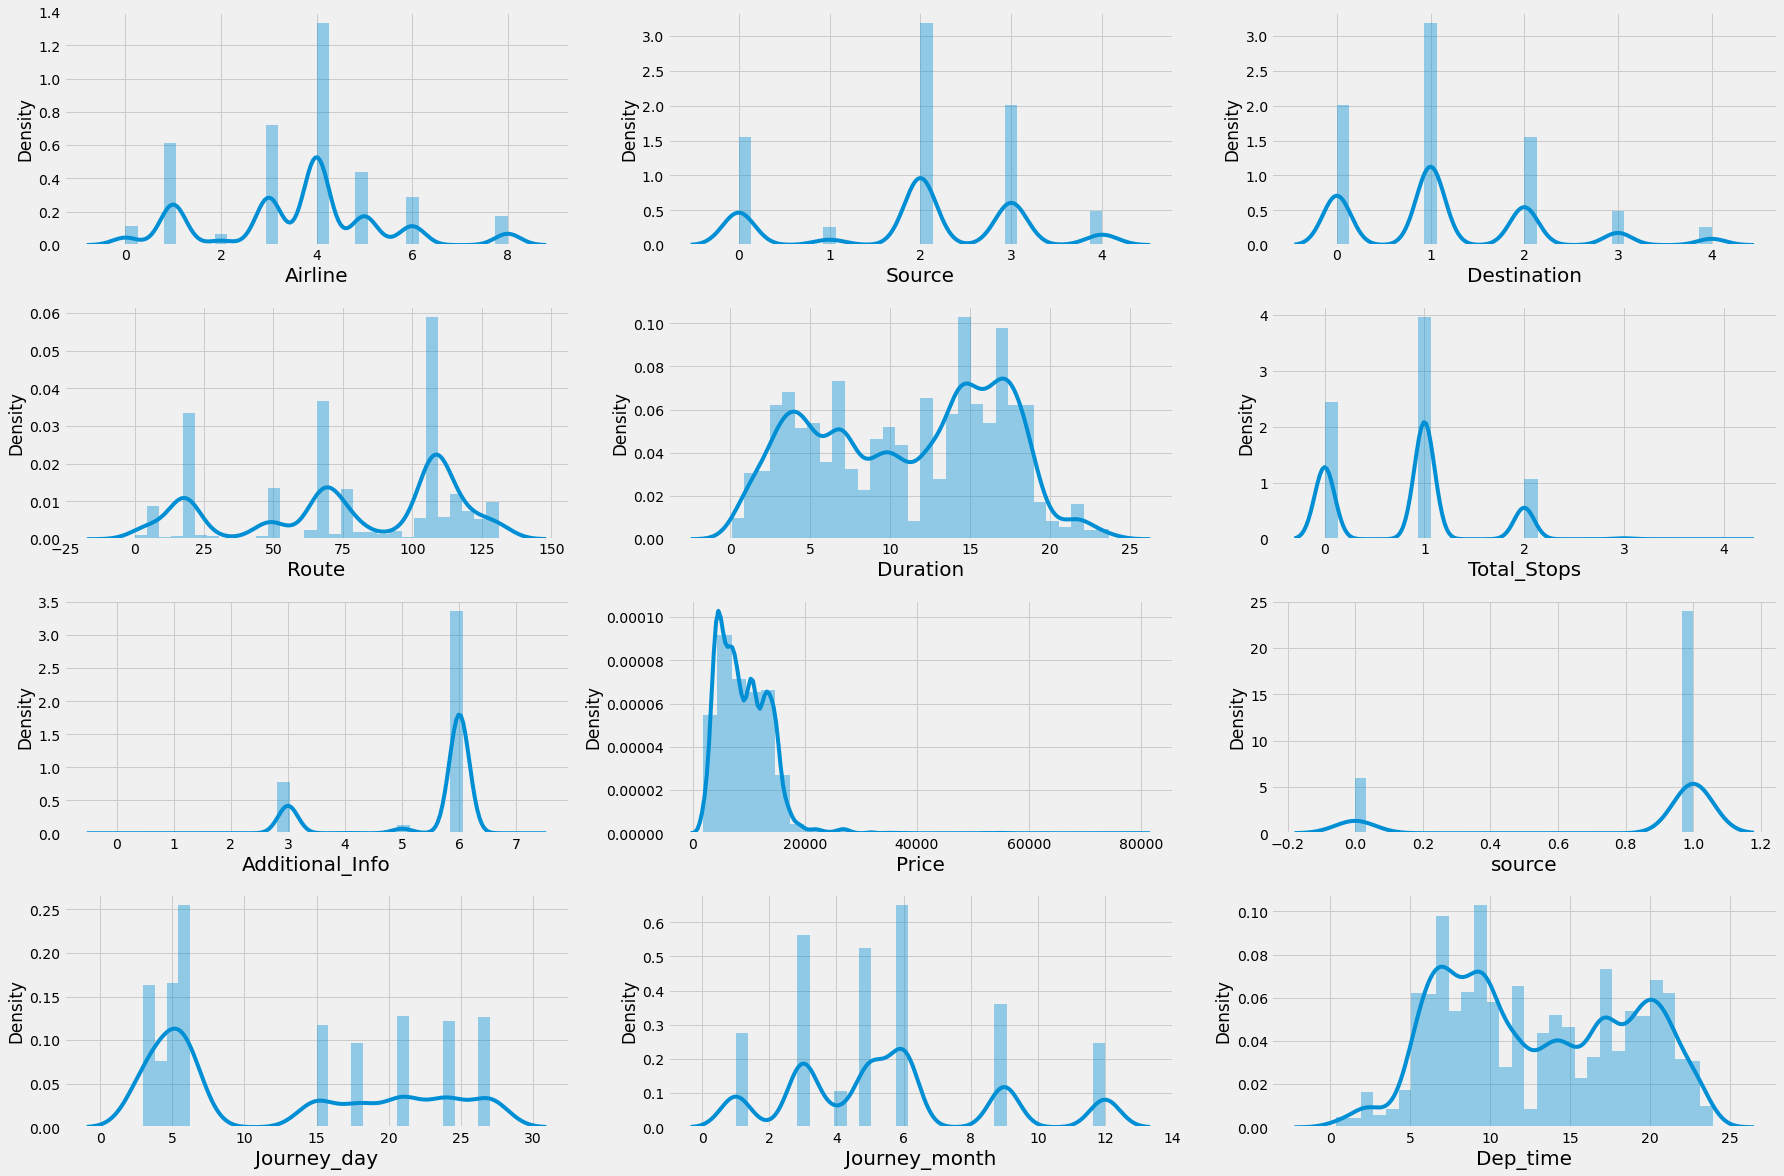

In [44]:
#Lets have a look on distribution of our data
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()


##### By looking at the above distribution plots we can see skewness in many columns, but these are categorical data , we can remove outliers from Duration and Dep_time as these are derived from datetime types.

In [45]:
#lets check the skewness
df.skew()

Airline            0.134301
Source            -0.424151
Destination        0.837084
Route             -0.521448
Duration          -0.121972
Total_Stops        0.317797
Additional_Info   -1.579064
Price              1.812552
source            -1.500051
Journey_day        0.389526
Journey_month      0.621749
Dep_time           0.121972
dtype: float64

In [46]:
# At first we will remove outliers from our data. thereafter again will check skewness
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Duration","Dep_time"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [47]:
#lets check the shape after removal of outliers
df.shape

(13354, 13)

Great we can see the data shape remains same as previous, as there is no any outlier present.

In [48]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [49]:
df.skew()

Airline            0.134301
Source            -0.424151
Destination        0.837084
Route             -0.521448
Duration          -0.121972
Total_Stops        0.317797
Additional_Info   -1.579064
Price              1.812552
source            -1.500051
Journey_day        0.389526
Journey_month      0.621749
Dep_time           0.121972
dtype: float64

##### As our data is categorical so I am not treating the skewness.

## Devide train and test Data sets

In [50]:
#Divide into test and train:
df_train = df.loc[df['source']== 1]
df_test = df.loc[df['source']== 0]
#test.reset_index(drop=True,inplace=True)

In [51]:
#lets have a look at our training data set
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,1.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,1.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,1.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,1.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,1.0,3,1,16.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,67.0,4.083333,0,6.0,4107.0,1.0,4,9,19.916667
10679,1.0,3.0,0.0,67.0,3.250000,0,6.0,4145.0,1.0,27,4,20.750000
10680,4.0,0.0,2.0,18.0,15.666667,0,6.0,7229.0,1.0,27,4,8.333333
10681,8.0,0.0,2.0,18.0,12.500000,0,6.0,12648.0,1.0,3,1,11.500000


In [52]:
#CHeck testing data
df_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Journey_day,Journey_month,Dep_time
10683,4.0,2.0,1.0,108.0,6.500000,1,6.0,NaN,0.0,6,6,17.500000
10684,3.0,3.0,0.0,94.0,17.666667,1,6.0,NaN,0.0,5,12,6.333333
10685,4.0,2.0,1.0,108.0,4.750000,1,3.0,NaN,0.0,21,5,19.250000
10686,5.0,2.0,1.0,108.0,16.000000,1,6.0,NaN,0.0,21,5,8.000000
10687,0.0,0.0,2.0,18.0,0.083333,0,6.0,NaN,0.0,24,6,23.916667
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.0,3.0,0.0,76.0,3.500000,1,6.0,NaN,0.0,6,6,20.500000
13350,3.0,3.0,0.0,67.0,9.666667,0,6.0,NaN,0.0,27,3,14.333333
13351,4.0,2.0,1.0,108.0,2.166667,1,6.0,NaN,0.0,3,6,21.833333
13352,1.0,2.0,1.0,108.0,20.000000,1,6.0,NaN,0.0,3,6,4.000000


In [53]:
#lets drop source column from dataset
df.drop(columns = ["source"], axis =1, inplace = True)

In [54]:
#Lets drop Price column from test as it is the o/p variable that needs to be predicted
df_test.drop(columns=["Price"],inplace=True)

In [55]:
#drop source column from train and test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [56]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,3897.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,7662.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,13882.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,6218.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,13302.0,3,1,16.833333


## Separate features and label

In [57]:
#lets saperate data into label and features
x = df_train.drop(columns = 'Price')
y = df_train["Price"]

In [58]:
#check features
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_time
0,3.0,0.0,2.0,18.0,1.666667,0,6.0,24,3,22.333333
1,1.0,3.0,0.0,87.0,18.166667,2,6.0,5,1,5.833333
2,4.0,2.0,1.0,122.0,14.583333,2,6.0,6,9,9.416667
3,3.0,3.0,0.0,95.0,5.916667,1,6.0,5,12,18.083333
4,3.0,0.0,2.0,29.0,7.166667,1,6.0,3,1,16.833333


##### Here we don't need to apply scaling as data is already in good scale with each other.

## Find Best randomstate

In [59]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.43676576401498246 on Random State 1


In [60]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 1)

## Model Building with Evaluation 

## LinearRegression Model

MAE : 2499.8196481043337
RMSE : 3509.241319218368
------------------------------
Training r2 Score : 43.2699582512223 %
Testing r2 Score: 43.381670837215225 %
------------------------------

Cross validation score : 43.500461252993745

Accuracy Score - Cross Validation Score : -0.11879041577851979


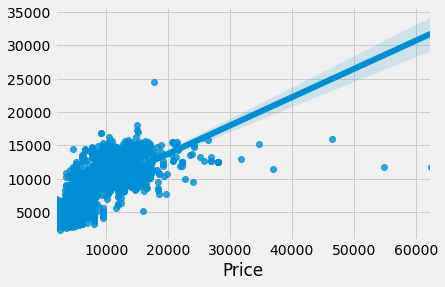

In [61]:
#Model with LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

r2score = r2_score(y_test,pred_lr)*100

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(lr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_lr)
plt.show()

## DecisionTreeRegressor Model

MAE : 825.9916871690646
RMSE : 2099.4441005316817
------------------------------
Training r2 Score : 97.28145099376324 %
Testing r2 Score: 79.73534512370746 %
------------------------------

Cross validation score : 83.47383754302756

Accuracy Score - Cross Validation Score : -3.738492419320096


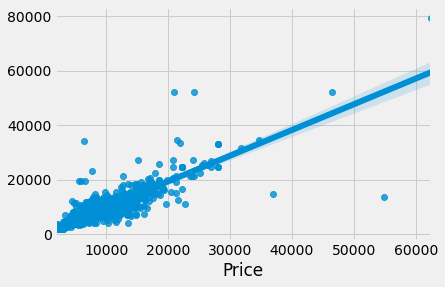

In [62]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

r2score = r2_score(y_test,pred_dt)*100

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(dt, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_dt)
plt.show()

## RandomForestRegressor Model

MAE : 750.8846391808911
RMSE : 1630.9724235848444
------------------------------
Training r2 Score : 96.08624329905145 %
Testing r2 Score: 87.77007435765044 %
------------------------------

Cross validation score : 87.66040114584555

Accuracy Score - Cross Validation Score : 0.10967321180488909


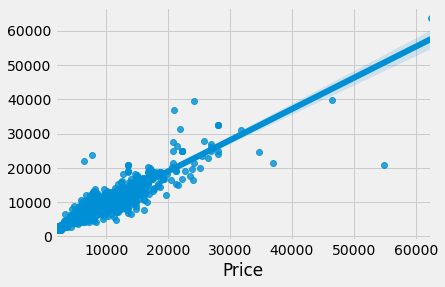

In [63]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

r2score = r2_score(y_test,pred_rf)*100

#evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(rf, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_rf)
plt.show()

## KNeighborsRegressor Model

MAE : 1695.7488581055784
RMSE : 2722.7742611066687
------------------------------
Training r2 Score : 77.92080276449548 %
Testing r2 Score: 65.91574126634276 %
------------------------------

Cross validation score : 67.13089506978675

Accuracy Score - Cross Validation Score : -1.2151538034439824


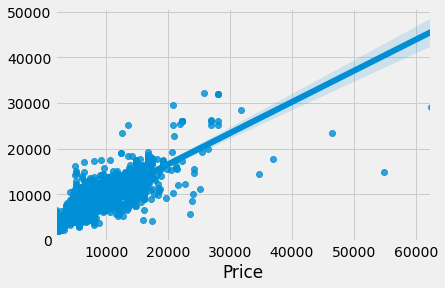

In [64]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

r2score = r2_score(y_test,pred_knr)*100

#evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(knr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_knr)
plt.show()

## XGBRegressor Model

MAE : 784.5907380487178
RMSE : 1600.3481711168859
------------------------------
Training r2 Score : 94.92217403640676 %
Testing r2 Score: 88.22503740633914 %
------------------------------

Cross validation score : 88.50136859943431

Accuracy Score - Cross Validation Score : -0.2763311930951744


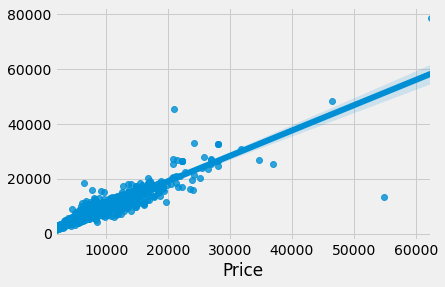

In [65]:
#lets check with XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_train)
pred_xgb = xgb.predict(x_test)

r2score = r2_score(y_test,pred_xgb)*100

#evaluation
mse = mean_squared_error(y_test,pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgb)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(xgb, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

sns.regplot(y_test,pred_xgb)
plt.show()

###### Great RandomForestRegressor algorithm is giving least difference in r2score and cv score, hence I am selecting it for hyperparameter tuning as best suitable algorithm.

## Hyperparameter Tuning

In [66]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [12,15,20,22],
                'n_estimators':[800,900,1000,1200],
                'min_samples_split': [2]
                }

In [67]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 15, 20, 22],
                         'min_samples_split': [2],
                         'n_estimators': [800, 900, 1000, 1200]})

In [68]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 800}

## Final model

In [69]:
#lets train and test our final model with best parameters
model = RandomForestRegressor(max_depth = 15, min_samples_split = 2, n_estimators = 800)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")


MAE : 737.6662172493312
RMSE : 1592.277530324997
------------------------------
 
r2 Score: 88.3435014639846 %


###### Great we have got improver our accuracy from 87.66% to 88.34% after Hyperparameter tuning.

-__Lets see final Actual Vs Predicted sample.__

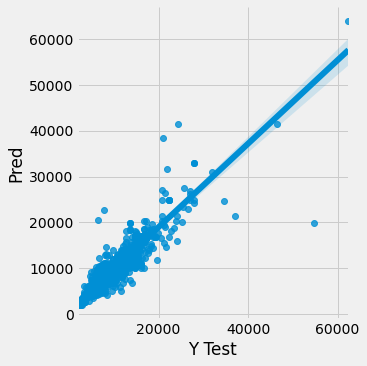

In [70]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

## Predict flight price for test dataset using final model

In [71]:
#lets predict the price with our best model
prediction = model.predict(df_test)

In [72]:
#lets make the dataframe for prediction
flt_price = pd.DataFrame(pred, columns=["Price"])

In [73]:
#lets have a look at predicted prices
flt_price

,Price
0,2005.117083
1,5472.522363
2,14467.071026
3,19967.047846
4,10263.444478
...,...
2666,14527.450259
2667,10205.822587
2668,5652.360000
2669,4008.846517


In [74]:
#Lets save the submission to csv
flt_price.to_csv("Flight_Price_Predictions.csv",index=False)

## Save the final Model

In [75]:
import joblib
joblib.dump(model,"FlightPrice_Prediction.pkl")

['FlightPrice_Prediction.pkl']

Finally I have saved my final model in .pkl file.